A área de machine learning, apesar de ser considerada relativamente nova, já conta com uma infinidade de algoritmos dos mais diversos tipos e aplicações. É fato que muitos destes algoritmos são oriundos da área de mineração de dados, como é o caso do K-means, Beyes, dentre outros. Neste artigo, será abordado o funcionamento do algoritmo Random Forest, que baseia-se justamente em um dos algoritmos mais básicos da área de mineração de dados: as árvores de decisão.

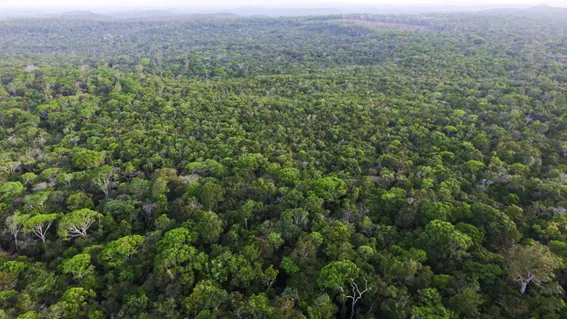


## Árvores de decisão

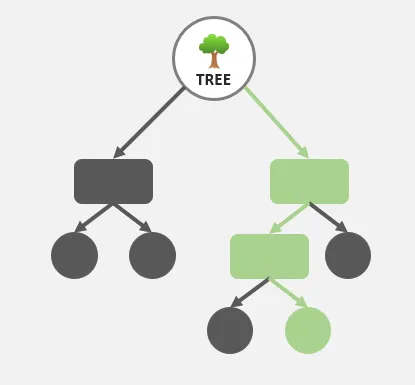

As árvores de decisão representam uma das formas mais simplificadas de um sistema de suporte à decisão. É um método estatístico, de aprendizagem supervisionada, podendo ser utilizado em problemas de classificação e na realização de previsões.

A partir de um conjunto de dados existente, o método cria uma representação do conhecimento ali embutido, em formato de árvore. Os nós da árvore são criados a partir das características (features) do conjunto de dados. Obviamente existe uma série de cálculos matemáticos envolvidos na escolha de uma determinada feature como nó em uma determinada posição da árvore. Para entender melhor esses cálculos, sugiro a leitura deste artigo.

A biblioteca scikit-learn do Python já tem implementado um algoritmo para geração de arvores de decisão. E o mais legal é que dá para gerar um PDF com a representação gráfica da árvore gerada a partir do dataset fornecido utilizando a biblioteca export_graphviz.

Para mostrar a implementação deste exemplo, o dataset cujos dados são provenientes do naufrágio mais famoso da história: TITANIC.

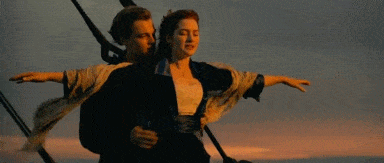



O dataset com os dados referentes aos passageiros do titanic foram obtidos do Kaggle. As características dos passageiros são:
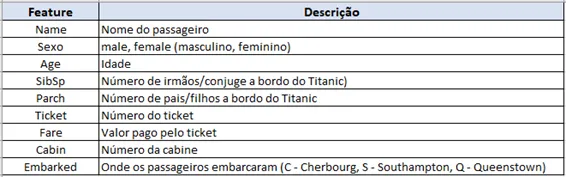

Nesta primeira abordagem, foi feita a remoção das features Name, Ticket e Cabin. Ticket e Name foram removidos porque eram únicos por passageiro, o que a torna irrelevante para a geração do modelo (apesar da feature Name possuir pronome de tratamento). Já Cabin , apesar de ter sido removida, pode possuir alguma informação escondida, como por exemplo, a localização das acomodações que foram acometidas de água primeiro, ou suas localizações não propiciavam uma fuga rápida, etc. Além disso, não foram aplicados encoders e nenhum pré-processamento mais rebuscado nos dados, pois tudo isso será abordado em um outro momento, quando formos tratar de feature engineering em um artigo futuro 😊

Utilizando o DecisionTreeClassifier do scikit-learn, obtemos a seguinte árvore de decisão (considerando profundidade de 3 níveis — lembrando que a quantidade de níveis é um parâmetro que pode influenciar diretamente no desempenho e na acurácia das respostas do modelo):

In [ ]:
from IPython.core.display import display, HTML
import pandas as pd
import os

display(HTML('<b>Dirs</b>'))
print(os.listdir("/content"))

display(HTML('<b>Importing data</b>'))

['.config', 'test.csv', 'gender_submission.csv', 'train.csv', 'sample_data']


In [ ]:
folder = "/content"

passengers_df = pd.read_csv(folder + "/gender_submission.csv")
train_df = pd.read_csv(folder + "/train.csv")
tests_df = pd.read_csv(folder + "/test.csv")

display(HTML('<b>Removing useless features</b>'))

In [ ]:
train_df.drop('Ticket', axis=1, inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)
train_df.drop('Name', axis=1, inplace=True)
train_df.drop('PassengerId', axis=1, inplace=True)

tests_df.drop('Ticket', axis=1, inplace=True)
tests_df.drop('Cabin', axis=1, inplace=True)
tests_df.drop('Name', axis=1, inplace=True)
tests_df.drop('PassengerId', axis=1, inplace=True)


print(train_df)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [ ]:
print(train_df.isnull().sum())
print(tests_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [ ]:
import numpy as np
import random

random.seed(100)

train_df['Age'].fillna(0,inplace=True)
tests_df['Age'].fillna(0,inplace=True)

age_df = pd.concat([train_df['Age'], tests_df['Age']])
mean = age_df.mean()
std = age_df.std()

train_df['Age'] = np.where(train_df['Age'] == 0, (np.random.randint(mean - std,mean + std)), train_df['Age'])
tests_df['Age'] = np.where(tests_df['Age'] == 0, (np.random.randint(mean - std,mean + std)), tests_df['Age'])



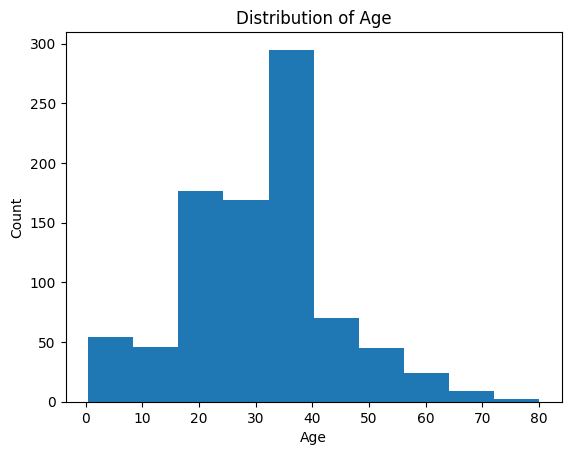

In [ ]:
display(HTML('<b>Checking age distribution </b>'))

import matplotlib.pyplot as plt
plt.hist(train_df['Age'],bins = 10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

<ipython-input-37-f679916d8933>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Embarked", kind="count", palette="ch:.23", data=train_df);


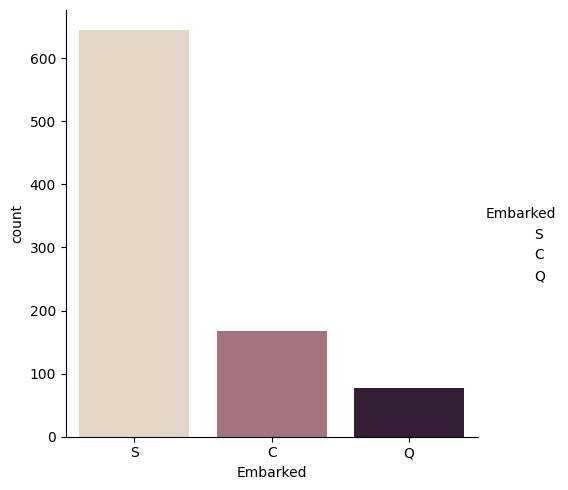

In [ ]:
display(HTML('<b>Checking Embark data </b>'))

import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="Embarked", kind="count", palette="ch:.23", data=train_df);

In [ ]:
display(HTML('<b> Encoding category columns  </b>'))


embarked = {"C":0,"Q":1,"S":2}

train_df['Sex'] = train_df['Sex'].replace('male', 0)
train_df['Sex'] = train_df['Sex'].replace('female', 1)

train_df['Embarked'] = train_df['Embarked'].replace('C', 0)
train_df['Embarked'] = train_df['Embarked'].replace('Q', 1)
train_df['Embarked'] = train_df['Embarked'].replace('S', 2)


print(train_df)

display(HTML('<b> Creating variables to feed the model  </b>'))


     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.0      1      0   7.2500       2.0
1           1       1    1  38.0      1      0  71.2833       0.0
2           1       3    1  26.0      0      0   7.9250       2.0
3           1       1    1  35.0      1      0  53.1000       2.0
4           0       3    0  35.0      0      0   8.0500       2.0
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    0  27.0      0      0  13.0000       2.0
887         1       1    1  19.0      0      0  30.0000       2.0
888         0       3    1  37.0      1      2  23.4500       2.0
889         1       1    0  26.0      0      0  30.0000       0.0
890         0       3    0  32.0      0      0   7.7500       1.0

[891 rows x 8 columns]


In [ ]:
train_df = train_df.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

X_train_total = train_df.drop('Survived',axis = 1)
y_train_total = train_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X_train_total, y_train_total, test_size=0.2, random_state=120)


In [ ]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
850,3,0,4.0,4,2,31.2750,2.0
278,3,0,7.0,4,1,29.1250,1.0
477,3,0,29.0,1,0,7.0458,2.0
208,3,1,16.0,0,0,7.7500,1.0
510,3,0,29.0,0,0,7.7500,1.0
...,...,...,...,...,...,...,...
383,1,1,35.0,1,0,52.0000,2.0
736,3,1,48.0,1,3,34.3750,2.0
159,3,0,37.0,8,2,69.5500,2.0
769,3,0,32.0,0,0,8.3625,2.0


In [ ]:
display(HTML('<b> Creating Decision tree model  </b>'))
print(list(x_train))


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [ ]:
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz
#from sklearn.externals import joblib


decision_tree = tree.DecisionTreeClassifier(max_depth=3)

decision_tree = decision_tree.fit(x_train,y_train)

In [ ]:
dot_data = tree.export_graphviz(decision_tree, feature_names = list(x_train),class_names = ['Died', 'Survived'],out_file = None )
graph = Source(dot_data)
graph.render("test")

'test.pdf'

In [ ]:
display(HTML('<b> Calculating cross validation  for decision tree</b>'))

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print(cross_val_score(decision_tree, x_test, y_test, cv = 10))
pred = decision_tree.predict(x_test)
print('Accuracy of ', accuracy_score(pred, y_test)*100)

[0.77777778 0.77777778 0.77777778 0.83333333 0.88888889 0.94444444
 0.83333333 0.83333333 0.82352941 0.76470588]
Accuracy of  80.33707865168539


Ok, so far, so good. Mas vamos supor que para um outro problema, nosso dataset tenha uma quantidade muito maior de features. Concordam que a tendência é que essa árvore aumente de profundidade a medida que novas features são incluídas ao dataset? O problema disso é que uma árvore com grande profundidade tende a responder muito bem a dados conhecidos, porém perca poder de generalização e responda mal a dados desconhecidos (o famoso e temido overfitting).

E se, ao invés de criar uma única árvore de decisão com TODAS as features ao mesmo tempo (juntas e shallow now) criarmos pequenas árvores de decisão a partir de algumas features aleatórias? E no final, fazermos uma votação a partir dos valores retornados por cada árvore? Pois essa é exatamente a abordagem adotada no Random Forest!

## Finalmente…Random Forest!

O nome Random Forest faz todo o sentido quando se pensa em seu funcionamento: random significa aleatório, e denota o comportamento do algoritmo ao selecionar subconjuntos de features e montar mini árvores de decisão. Forest significa floresta, já que são geradas várias árvores de decisão.
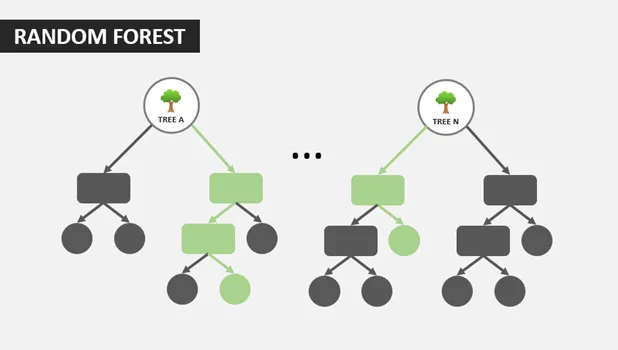

Ou seja, basicamente, o algoritmo possui 4 passos:

* Seleção aleatória de algumas features

* Seleção da feature mais adequada para a posição de nó raiz

* Geração dos nós filhos

* Repete os passos acima até que se atinja a quantidade de árvores desejada

Depois que o modelo é gerado, as previsões são feitas a partir de “votações”. Cada mini árvore toma uma decisão a partir dos dados apresentados. A decisão mais votada é a resposta do algoritmo.

Se olharmos atentamente, a forma de funcionamento do random forest é baseada em Bootstrapp Aggregation (Bagging), o que o torna um algoritmo ensambled, que nada mais é do que a combinação de previsões de múltiplos algoritmos de machine learning juntos, de forma a obter previsões mais acuradas do que qualquer modelo individual. Para mais detalhes sobre bagging, acesse este link.

Por que Random Forest é tão famoso e amplamente adotado?

* Por ter suas origens na forma mais básica e inicial de um algoritmo de suporte a decisão (as árvores de decisão), fica muito fácil entender seu funcionamento
* Random Forests resolvem problemas tanto de regressão (ex.: prever valor de uma casa) quanto de classificação (e-mail é spam ou não é spam)
* Apresenta bons resultados em diversos tipos de problema
* Tem bom desempenho
* Possui implementações nas mais diversas bibliotecas de inteligência artificial disponíveis atualmente

É importante lembrar que tanto árvore de decisão quanto random forest estão disponíveis na biblioteca scikit-learn. Abaixo seguem alguns resultados obtidos com a aplicação de ambos os métodos utilizando o mesmo conjunto de dados de passageiros do titanic:

In [ ]:
display(HTML('<b> Calculating cross validation  for Random Forest</b>'))
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators = 100)
model_rf = clf.fit(x_train, y_train)

print(cross_val_score(model_rf, x_test, y_test, cv = 10))
pred = model_rf.predict(x_test)
print('Accuracy of ', accuracy_score(pred, y_test)*100)

[0.55555556 0.77777778 0.77777778 0.77777778 0.88888889 0.88888889
 0.72222222 0.83333333 0.88235294 0.82352941]
Accuracy of  78.65168539325843
